In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
data=load_breast_cancer()
X=data.data
y=data.target
print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (569, 30)
y Shape: (569,)


In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)  
X_test=scaler.transform(X_test)
ann=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',max_iter=3000,random_state=42)
ann.fit(X_train,y_train)
y_pred=ann.predict(X_test)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[ 62   1]
 [  1 107]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Accuracy: 0.9883040935672515


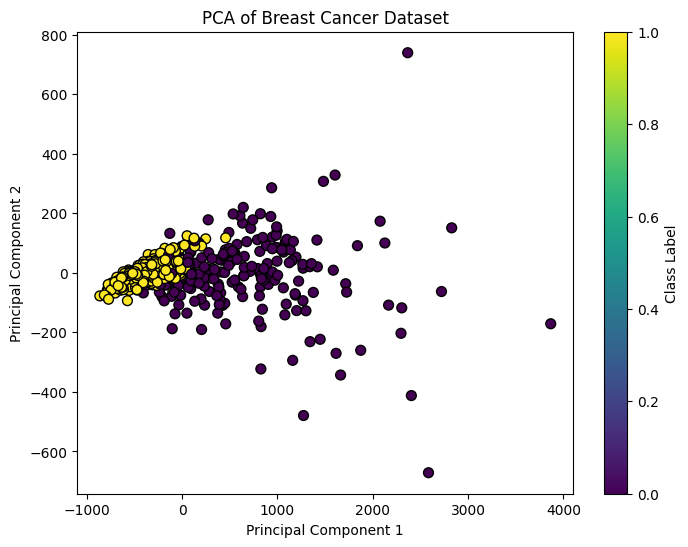

In [5]:
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y,cmap='viridis',edgecolor='k',s=50)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class Label')
plt.show()

In [7]:
mlp= MLPClassifier(hidden_layer_sizes=(32,16),activation='relu',solver='adam',max_iter=2000,random_state=42)
mlp.fit(X_reduced,y_train)
y_pred= mlp.predict(X_reduced)
print("Confusion Matrix for MLP on PCA data:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report for MLP on PCA data:\n", classification_report(y_test, y_pred))
print("Accuracy for MLP on PCA data:", accuracy_score(y_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [569, 398]